# Gauss-Hermite Quadrature
## Efficient numerical integration method with weight function exp(-x^2)
## You need this for implementing Kennedy's method

There are two versions: 
* [Probabilists’ Gauss-Hermite module](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.polynomials.hermite_e.html):
integration weight is the standard normal PDF: exp(-x^2/2)

* [Physicists’ Gauss-Hermite module](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.polynomials.hermite.html):
integration weight is exp(-x^2)

We mostly use __Probabilists’ Gauss-Hermite module__. You still need to devide the weight by sqrt(2*pi) for use with normal PDF

In [1]:
import numpy as np
import numpy.polynomial as nppoly
import scipy
import scipy.stats as ss
import matplotlib.pyplot as plt

In [2]:
const = 1/np.sqrt(2.0*np.pi)

In [3]:
z, w = nppoly.hermite_e.hermegauss(deg=20)
w = w*const
print(z)
print(w)

[-7.61904854 -6.51059016 -5.57873881 -4.73458133 -3.94396735 -3.18901482
 -2.45866361 -1.74524732 -1.04294535 -0.34696416  0.34696416  1.04294535
  1.74524732  2.45866361  3.18901482  3.94396735  4.73458133  5.57873881
  6.51059016  7.61904854]
[1.25780067e-13 2.48206236e-10 6.12749026e-08 4.40212109e-06
 1.28826280e-04 1.83010313e-03 1.39978374e-02 6.15063721e-02
 1.61739334e-01 2.60793063e-01 2.60793063e-01 1.61739334e-01
 6.15063721e-02 1.39978374e-02 1.83010313e-03 1.28826280e-04
 4.40212109e-06 6.12749026e-08 2.48206236e-10 1.25780067e-13]


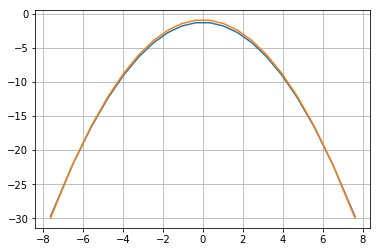

In [4]:
pdf = ss.norm.pdf(z)
plt.plot(z, np.log(w))
plt.plot(z, np.log(pdf))
plt.grid()
plt.show()

## Exact integration of polynomials with degree upto _2*deg-1_

In [5]:
z, w = nppoly.hermite_e.hermegauss(deg=3)
w = w*const
sum(w)

1.0

In [6]:
# Let's test on the moments of normal distribution
deg = np.array([2,4,6,8,10,12,14])
moments = [sum(z**2 * w), sum(z**4 * w), sum(z**6 * w), sum(z**8 * w), sum(z**10 * w), sum(z**12 * w), sum(z**14 * w)]
print(moments)

[0.9999999999999998, 2.9999999999999996, 9.0, 27.000000000000004, 81.00000000000003, 243.00000000000009, 729.0000000000005]


In [10]:
# luckily we know the exact answer: (2*deg-1)!! 
scipy.special.factorial2([1,3,5,7,9,11,13])

array([1.00000e+00, 3.00000e+00, 1.50000e+01, 1.05000e+02, 9.45000e+02,
       1.03950e+04, 1.35135e+05])

In [12]:
# Find out upto which degree integration is correct
deg[np.abs(moments - scipy.special.factorial2([1,3,5,7,9,11,13])) < 0.1 ]

array([2, 4])

# Overall GHQ is very accurate for integrating smooth functions

Let's test on Geometric Brownian Motion:

$ S_T = S_0 exp\left(\sigma\sqrt{T} z - \frac12 \sigma^2 T\right)$

In [13]:
spot = 100
texp = 2
vol = 0.2

In [14]:
z = np.linspace(-5,5,10)
price = spot * np.exp(vol*np.sqrt(texp)*z - 0.5*vol*vol*texp)
print(price)

[ 23.35839909  31.983697    43.79396334  59.96527623  82.10799112
 112.42710165 153.94181507 210.78620794 288.6209016  395.19675245]


In [15]:
# Let's check the expectation of the prices are same as 100 (assuming 0 interest rate)
z, w = nppoly.hermite_e.hermegauss(deg=10)
w = w*const
price = spot * np.exp(vol*np.sqrt(texp)*z - 0.5*vol*vol*texp)
price_mean = sum(price * w)
price_mean - 100

-1.4210854715202004e-14

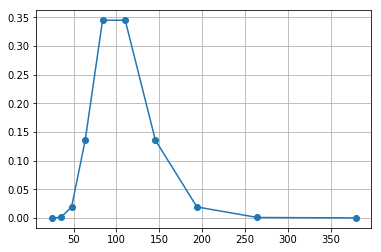

In [16]:
plt.plot(price, w, 'o-')
plt.grid()
plt.show()